## Multiple Linear Regression

**Multiple linear regression** is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. The goal is to understand how the dependent variable changes when any one of the independent variables is varied, while the other independent variables are held fixed.

### Regression Equation

The general form of a multiple linear regression model is:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n + \epsilon
$$

Where:


- $Y$ is the dependent variable.  
- $X_1, X_2, \dots, X_n$ are the independent variables.  
- $\beta_0$ is the intercept.  
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients that represent the relationship between each independent variable and the dependent variable.  
- $\epsilon$ is the error term, representing the variation in $Y$ that cannot be explained by the independent variables.  


## Applications

In practice, multiple linear regression is used in various fields such as:

- **Economics** – Predicting market trends and economic indicators.  
- **Biology** – Analyzing the effects of multiple factors on biological processes.  
- **Engineering** – Optimizing system performance based on multiple input variables.  
- **Social Sciences** – Understanding relationships between different social factors.  


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [64]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(3)

,Age,YearsofExperience,Unnamed: 2,Salary
0,32.0,5.0,NaN,90000.0
1,28.0,3.0,NaN,65000.0
2,45.0,15.0,NaN,150000.0


In [65]:
dataset.isnull().sum()

Age                     2
YearsofExperience       3
Unnamed: 2           6704
Salary                  5
dtype: int64

In [66]:
dataset = dataset.drop(dataset.columns[[2]],axis=1)
dataset.head(3)

,Age,YearsofExperience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0


In [67]:
dataset["Age"].fillna(dataset["Age"].mode()[0],inplace=True)
dataset["YearsofExperience"].fillna(dataset["YearsofExperience"].mode()[0],inplace=True)
dataset["Salary"].fillna(dataset["Salary"].mode()[0],inplace=True)

C:\Users\shark\AppData\Local\Temp\ipykernel_9168\3372521522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mode()[0],inplace=True)
C:\Users\shark\AppData\Local\Temp\ipykernel_9168\3372521522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [68]:
dataset.isnull().sum()

Age                  0
YearsofExperience    0
Salary               0
dtype: int64

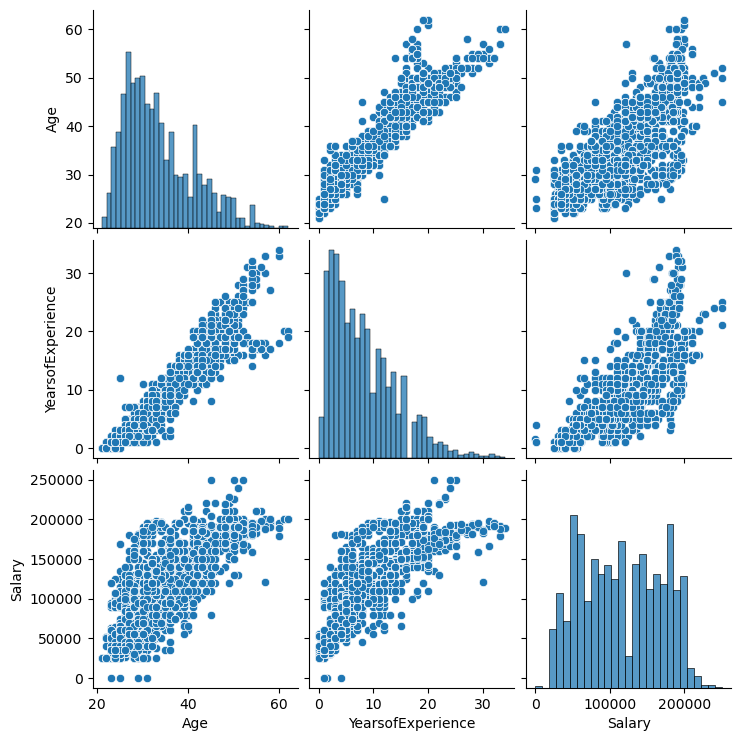

In [69]:
#use pairplot
sns.pairplot(data=dataset)
plt.show()

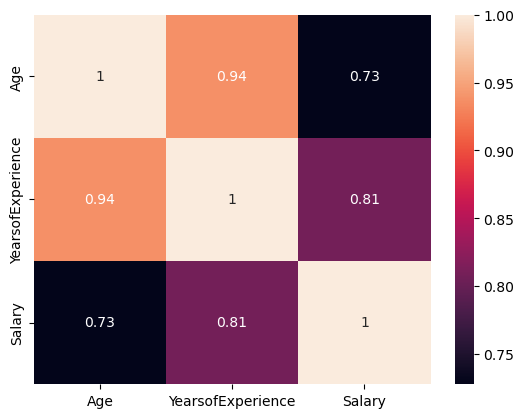

In [70]:
#use heatmap
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [71]:
x = dataset.iloc[:,:-1]
y = dataset["Salary"]


In [72]:
x.shape
x.columns
y.values

array([ 90000.,  65000., 150000., ...,  55000., 140000.,  35000.])

In [73]:
x.head(2)

,Age,YearsofExperience
0,32.0,5.0
1,28.0,3.0


In [74]:
y.head(2)

0    90000.0
1    65000.0
Name: Salary, dtype: float64

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
print(f"X_train_shape: {x_train.shape} \n X_test_shape: {x_test.shape}")

X_train_shape: (5363, 2) 
 X_test_shape: (1341, 2)


In [76]:
x_test.ndim

2

**``Simple linear regression accept 2 dimension data``**

In [77]:
lr = LinearRegression()
lr.fit(x_train,y_train,)

LinearRegression()

In [78]:
print(f"Score: {lr.score(x_test,y_test)*100}%")

Score: 65.68094666519275%


**``Poor Quality accuracy``**

In [79]:
print(f"Intercept: {lr.intercept_}\nCoefficient: {lr.coef_}")

Intercept: 101478.7876403738
Coefficient: [-1788.82700969  9162.26723198]


In [80]:
print(f"Predict for 45.0 and 15.0 : {lr.predict([[45.0,15.0]])}")
y_pred = lr.coef_[0] * 45.0 + lr.coef_[1]*15.0 + lr.intercept_
print(f"Predict for 45.0 and 15.0 : {y_pred}")

Predict for 45.0 and 15.0 : [158415.58068424]
Predict for 45.0 and 15.0 : 158415.5806842412


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
lr.predict(x_test)

array([198642.30363155, 113956.80716691,  80667.26007479, ...,
       123119.07439889, 156626.75367455, 222551.45130812])

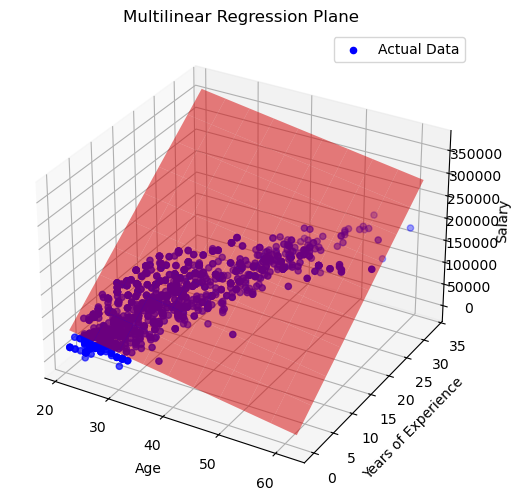

In [82]:

# Convert x_test to NumPy array if it's a DataFrame
x_test_np = x_test.to_numpy() if isinstance(x_test, pd.DataFrame) else x_test
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(x_test_np[:, 0], x_test_np[:, 1], y_test_np, c='blue', label="Actual Data")

# Create a grid for the regression plane
X_surface, Y_surface = np.meshgrid(
    np.linspace(x_test_np[:, 0].min(), x_test_np[:, 0].max(), 10),
    np.linspace(x_test_np[:, 1].min(), x_test_np[:, 1].max(), 10)
)

# Compute predicted values using the regression model
Z_surface = lr.intercept_ + lr.coef_[0] * X_surface + lr.coef_[1] * Y_surface

# Plot the regression plane
ax.plot_surface(X_surface, Y_surface, Z_surface, color='red', alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Years of Experience")
ax.set_zlabel("Salary")
plt.title("Multilinear Regression Plane")
plt.legend(["Actual Data"])
plt.show()